In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!ls

#machine learning.cheat
2014-2018_Station34_features.csv
2017-06-01-with_kmlshapes.csv
2017-06.csv
2017-06_feat.csv
2018-01-01 2018-06-28.csv
2018-01-01-with_kmlshapes.csv
2018-01-12-trump.csv
2018-05-01.csv
2018-05-02.csv
2018-06-28.csv
21.03.2019 USE this.csv
All stations with x(2018-05-02) nn.ipynb
All stations with x(2018-05-02) randomforest.ipynb
All stations with x(2018-05-02) svm&rfm Larger dataset loads of freatures trumps.ipynb
All stations with x(2018-05-02) svm&rfm Larger dataset.ipynb
All stations with x(2018-05-02) svm&rfm smaller time 05.30-00.30.ipynb
All stations with x(2018-05-02) svm&rfm.ipynb
All stations with x(2018-05-02) svm.ipynb
IMM5812_2-RGB4RWO.pdf
IMM5825_2-RGB4RVQ.pdf
JTRG-D-15-00385R2copy.pdf
K Means Clustering Project - Solutions.ipynb
Untitled.ipynb
additional data
an attempt was made to cluster.ipynb
anotherkml.csv
anotherkml2.csv
bad clustering with time (too much early time).pages
base_python_ml.py
base_x2018-05-02.csv
bikeclusters
cluster of clusters.

In [4]:
df = pd.read_csv('2018-01-01-with_kmlshapes.csv', index_col='timestamp', parse_dates=True)

In [5]:
df.head(2)

station_id  bikes  spaces  total_docks  norm  time  \
timestamp                                                                 
2018-01-01 00:00:02          42     24       6           30  0.80   0.0   
2018-01-01 00:00:02          30      3      17           20  0.15   0.0   

                     day_of_week  cluster  
timestamp                                  
2018-01-01 00:00:02            0        1  
2018-01-01 00:00:02            0        4

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9205208 entries, 2018-01-01 00:00:02 to 2018-06-28 16:46:02
Data columns (total 8 columns):
station_id     int64
bikes          int64
spaces         int64
total_docks    int64
norm           float64
time           float64
day_of_week    int64
cluster        int64
dtypes: float64(2), int64(6)
memory usage: 632.1 MB


In [7]:
df['hour'] = pd.DatetimeIndex(df.index).hour
df = df[df['hour']>5]
#df['hour'].value_counts()

In [8]:
df['day_of_week'] = pd.DatetimeIndex(df.index).dayofweek
df = df[df['day_of_week'] <5]
#df = df.drop('day_of_week', axis=1)

In [9]:
stations = pd.read_csv('different-clusters.csv')
clusters = stations['kml-c7.80.50-normed']

In [12]:
#the lambas function failed cos the file was too big, so i made it smaller
#df = df.loc[df.index > '2018-01-01']

In [13]:
#this is the lamda function to match the clusters
#df['cluster'] = df['station_id'].map(lambda x: clusters[x-1])

In [14]:
df.head(2)

station_id  bikes  spaces  total_docks      norm  time  \
timestamp                                                                     
2018-01-01 06:00:02          42     26       4           30  0.866667   6.0   
2018-01-01 06:00:02          30      3      17           20  0.150000   6.0   

                     day_of_week  cluster  hour  
timestamp                                        
2018-01-01 06:00:02            0        1     6  
2018-01-01 06:00:02            0        4     6

In [15]:
#doesn't work
#df['cluster'] = df['station_id'].apply(lambda x: clusters[x-1])

In [27]:
#this one worked
#df['cluster'] = df['station_id'].apply(lambda x: clusters[x-1] if x in clusters else -1)

In [41]:
#i didnt have to use this
#df['cluster'] = df['station_id'].applymap(lambda x: clusters[x-1])

In [42]:
#use this to save out the file 
#df.to_csv('2018-01-01-with_kmlshapes.csv')

In [16]:
#pivot = pd.pivot_table(df, values = 'norm', columns='time', index = "station_id")

In [22]:
df.head(100)

station_id  bikes  spaces  total_docks      norm  time  \
timestamp                                                                     
2018-01-01 06:00:02          42     26       4           30  0.866667  6.00   
2018-01-01 06:00:02          30      3      17           20  0.150000  6.00   
2018-01-01 06:00:02          54     18      15           33  0.545455  6.00   
2018-01-01 06:00:02          56      8      32           40  0.200000  6.00   
2018-01-01 06:00:02           6     20       0           20  1.000000  6.00   
2018-01-01 06:00:02          18     20      10           30  0.666667  6.00   
2018-01-01 06:00:02          32     28       2           30  0.933333  6.00   
2018-01-01 06:00:02          52      9      23           32  0.281250  6.00   
2018-01-01 06:00:02          48      8      32           40  0.200000  6.00   
2018-01-01 06:00:02          13      3      27           30  0.100000  6.00   
2018-01-01 06:00:02          43      5      25           30  0.166667  6.00   
2018-01-01 06:00:02          81     15      25           40  0.375000  6.00   
2018-01-01 06:00:02          31      4      16           20  0.200000  6.00   
2018-01-01 06:00:02          98     14      16           30  0.466667  6.00   
2018-01-01 06:00:02          14     29       1           30  0.966667  6.00   
2018-01-01 06:00:02           1     18      13           31  0.580645  6.00   
2018-01-01 06:00:02          68      0      40           40  0.000000  6.00   
2018-01-01 06:00:02          74     14      16           30  0.466667  6.00   
2018-01-01 06:00:02          87     17      21           38  0.447368  6.00   
2018-01-01 06:00:02          84     10      20           30  0.333333  6.00   
2018-01-01 06:00:02          90      0      40           40  0.000000  6.00   
2018-01-01 06:00:02          11     11      19           30  0.366667  6.00   
2018-01-01 06:00:02          17     17       3           20  0.850000  6.00   
2018-01-01 06:00:02          45     23       7           30  0.766667  6.00   
2018-01-01 06:00:02          72      6      25           31  0.193548  6.00   
2018-01-01 06:00:02          63     25      10           35  0.714286  6.00   
2018-01-01 06:00:02          91      7      23           30  0.233333  6.00   
2018-01-01 06:00:02          99      7      23           30  0.233333  6.00   
2018-01-01 06:00:02           9     23       1           24  0.958333  6.00   
2018-01-01 06:00:02          67      2      38           40  0.050000  6.00   
...                         ...    ...     ...          ...       ...   ...   
2018-01-01 06:00:02          75     16      24           40  0.400000  6.00   
2018-01-01 06:00:02          26      9      11           20  0.450000  6.00   
2018-01-01 06:00:02          65      3      37           40  0.075000  6.00   
2018-01-01 06:00:02          15      0      16           16  0.000000  6.00   
2018-01-01 06:00:02          86      4      34           38  0.105263  6.00   
2018-01-01 06:00:02          35      0      30           30  0.000000  6.00   
2018-01-01 06:00:02          10     16       0           16  1.000000  6.00   
2018-01-01 06:00:02         100     10      15           25  0.400000  6.00   
2018-01-01 06:00:02          24     20       0           20  1.000000  6.00   
2018-01-01 06:00:02          64     21      19           40  0.525000  6.00   
2018-01-01 06:00:02          85     11      24           35  0.314286  6.00   
2018-01-01 06:00:02          33     23       0           23  1.000000  6.00   
2018-01-01 06:00:02          44      6      24           30  0.200000  6.00   
2018-01-01 06:00:02          89      3      37           40  0.075000  6.00   
2018-01-01 06:00:02          57      7      16           23  0.304348  6.00   
2018-01-01 06:00:02          80     18      22           40  0.450000  6.00   
2018-01-01 06:00:02          41      6      14           20  0.300000  6.00   
2018-01-01 06:00:02           3      8      12           20  0.400000  

In [37]:
#pivotClusters = pd.pivot_table(df, values = 'norm', columns=['cluster','hour'], index = "station_id")
pivotClusters = pd.pivot_table(df, values = 'norm', columns=['cluster','hour'], index = "station_id")

In [71]:
dfPivot = pd.pivot_table(df, values = 'norm', columns=['cluster','hour'], index = "station_id")
dfPivot.columns

MultiIndex(levels=[[-1, 1, 2, 3, 4, 5, 6, 7], [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,

In [72]:
dfPivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 1 to 112
Columns: 144 entries, (-1, 6) to (7, 23)
dtypes: float64(144)
memory usage: 124.6 KB


In [96]:
if (dfPivot.loc[2][111] > 0) == True:
    print("ttt")

In [56]:
stations['kml-c7.80.50-normed'].value_counts()

1    31
2    19
4    17
3    15
6    12
5    10
7     7
Name: kml-c7.80.50-normed, dtype: int64

4
11
23
27
33
34
37
41
42
43
44
59
74
75
77
79
81
82
83
84
85


/Users/neil/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


86
87
91
92
93
94
96
99
100
110
problem with:  111
problem with:  112
problem with:  113
problem with:  114
problem with:  115
problem with:  116
problem with:  117
problem with:  118
problem with:  119
12
18
19
24
26
35
46
52
55
56
57
61
62
67
68
88
89
97
98
problem with:  111
problem with:  112
problem with:  113
problem with:  114
problem with:  115
problem with:  116
problem with:  117
problem with:  118
problem with:  119
1
6
17
30
49
58
60
71
72
73
78
80
95
101
106
problem with:  111
problem with:  112
problem with:  113
problem with:  114
problem with:  115
problem with:  116
problem with:  117
problem with:  118
problem with:  119
2
3
5
14
16
28
29
45
70
76
102
103
104
105
107
108
problem with:  108
109
problem with:  111
problem with:  112
problem with:  113
problem with:  114
problem with:  115
problem with:  116
problem with:  117
problem with:  118
problem with:  119
10
36
38
39
40
50
53
54
63
64
problem with:  111
problem with:  112
problem with:  113
problem with:  114
pr

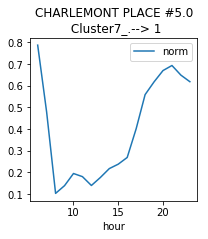

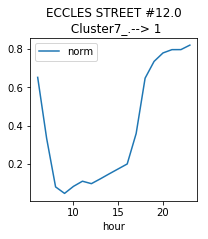

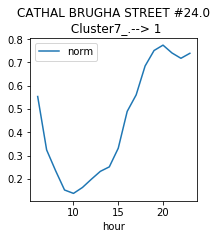

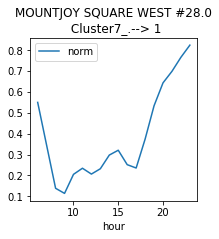

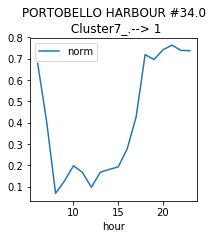

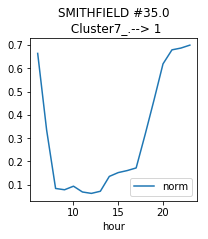

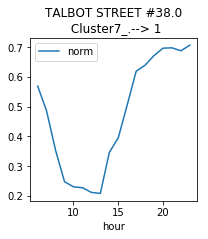

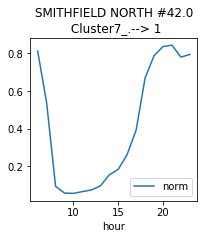

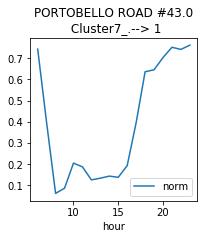

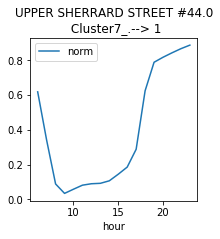

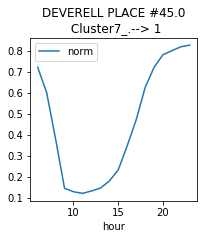

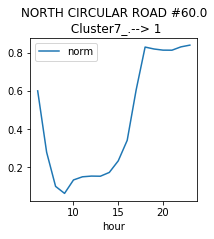

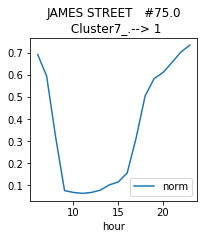

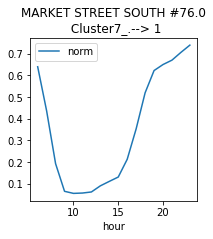

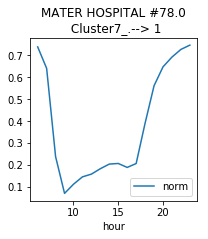

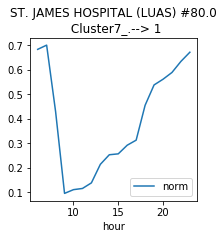

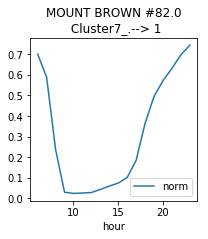

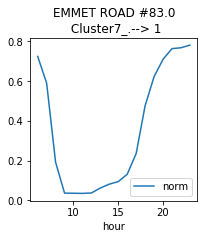

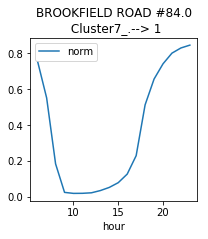

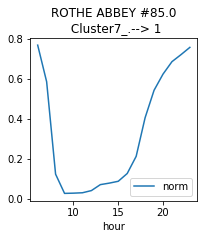

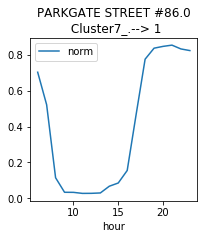

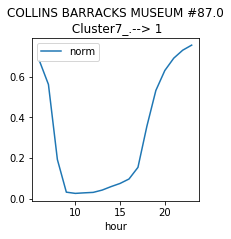

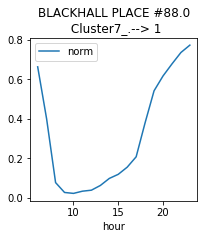

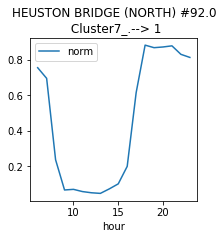

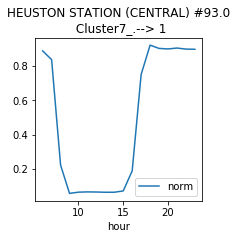

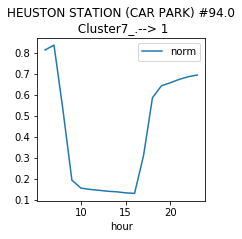

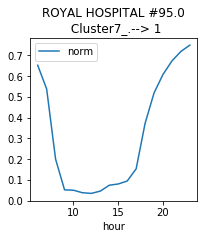

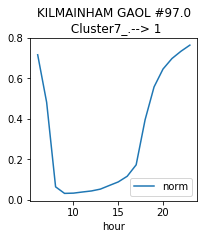

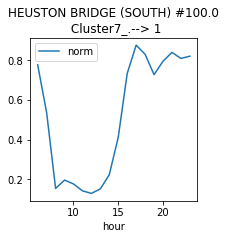

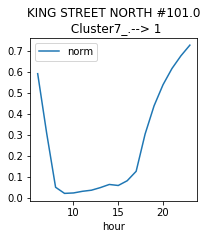

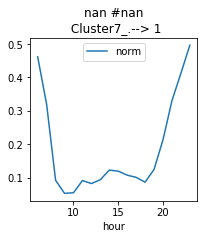

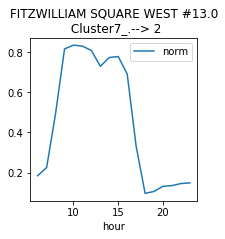

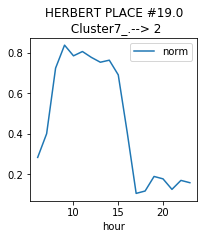

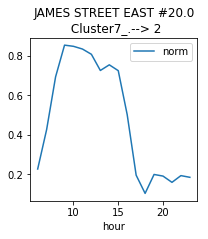

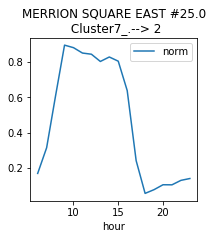

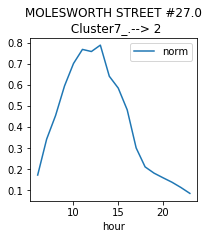

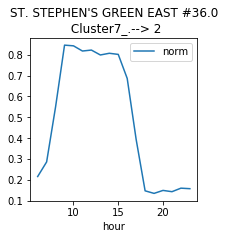

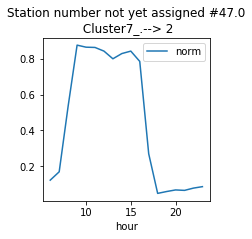

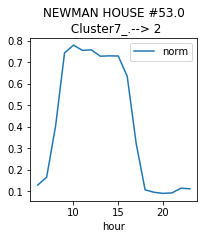

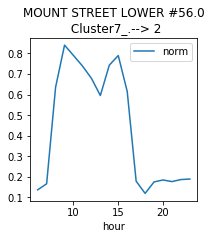

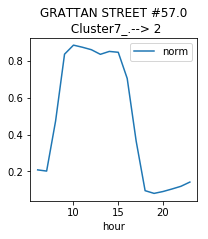

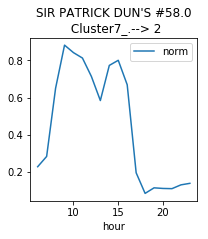

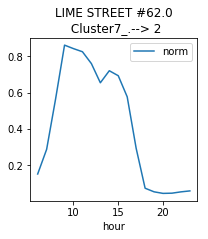

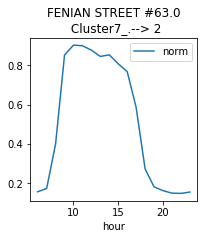

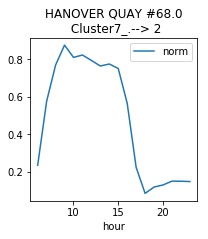

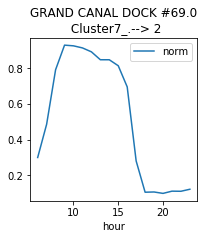

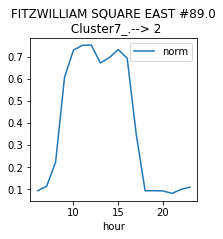

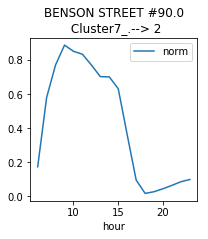

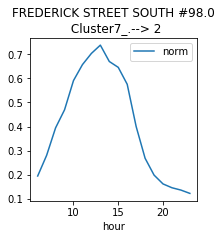

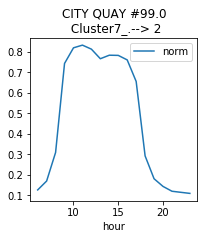

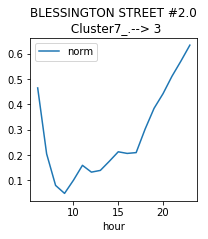

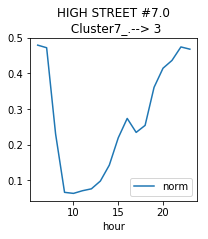

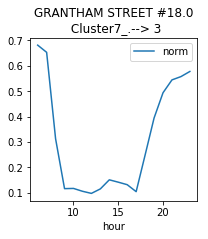

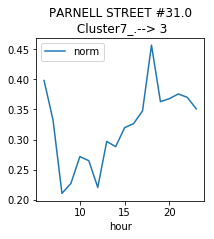

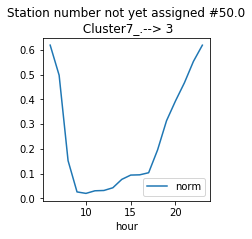

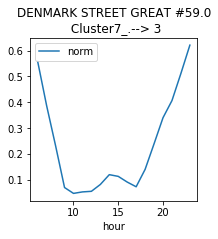

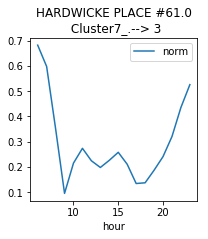

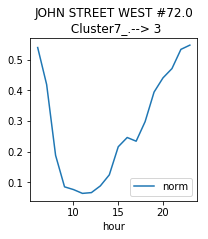

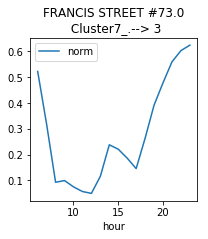

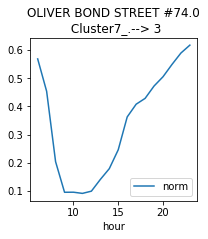

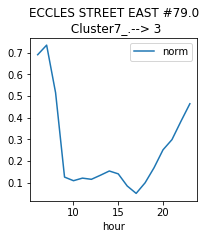

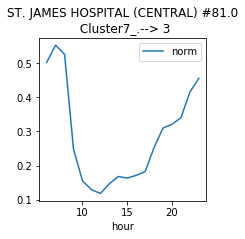

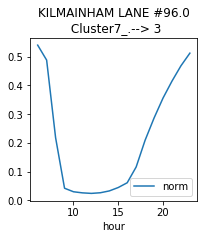

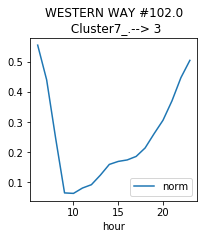

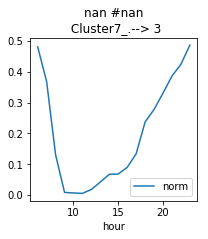

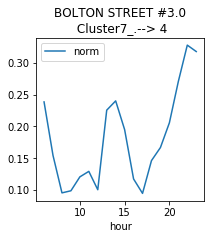

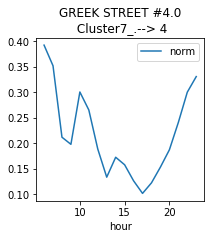

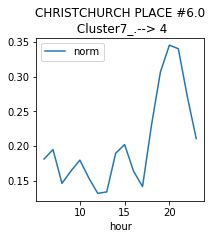

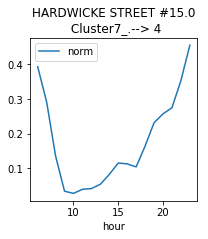

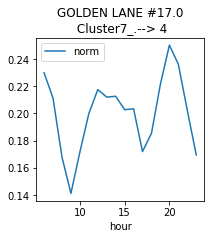

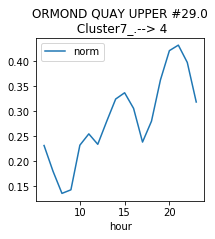

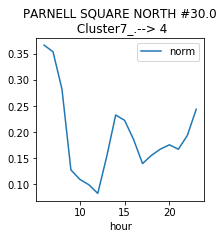

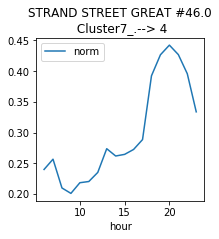

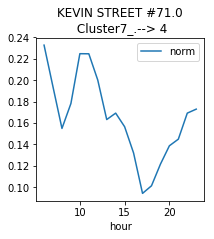

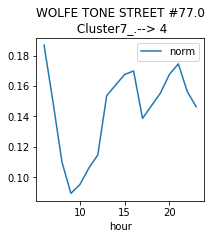

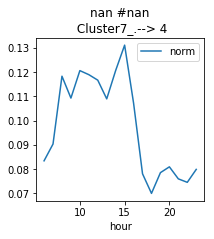

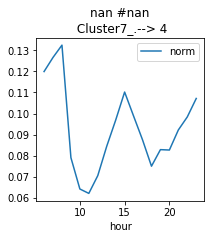

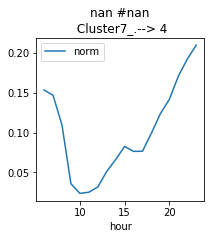

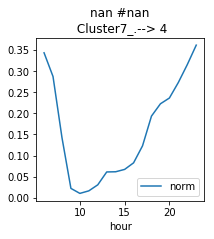

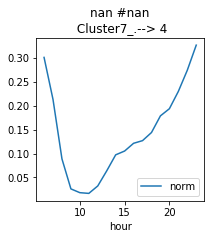

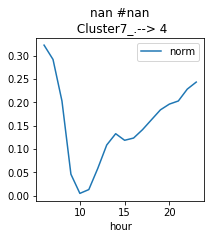

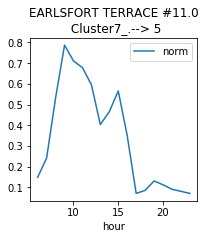

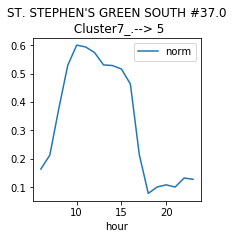

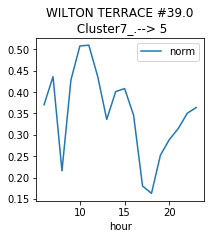

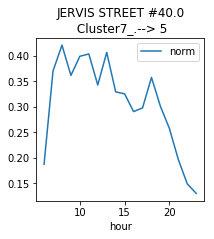

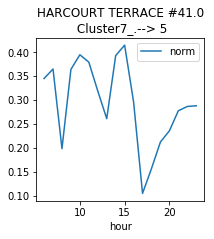

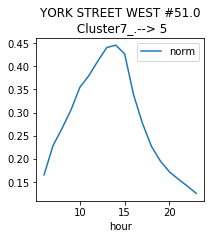

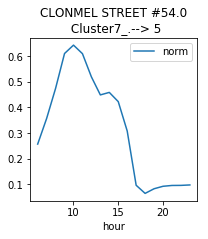

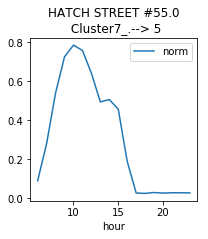

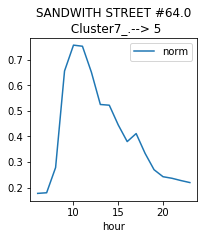

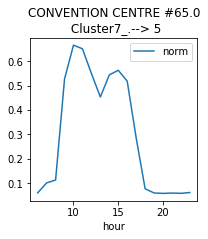

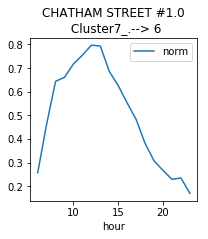

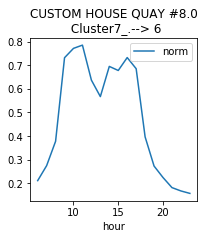

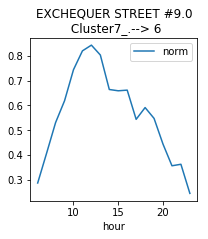

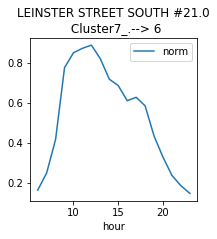

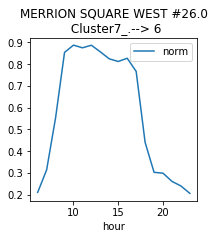

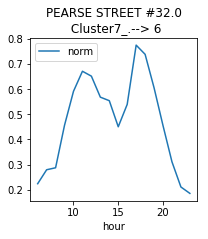

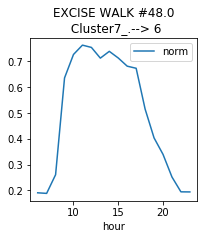

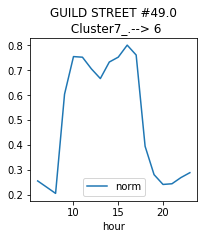

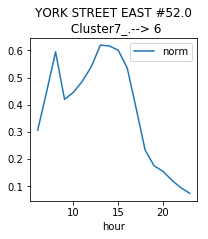

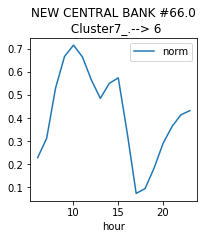

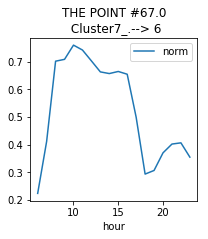

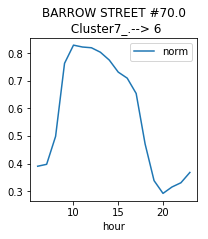

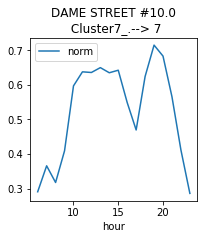

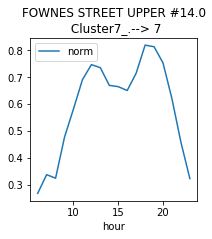

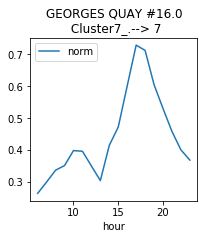

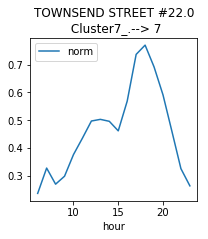

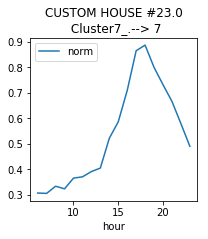

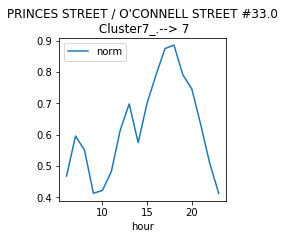

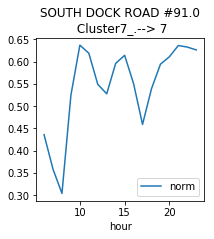

In [58]:
for j in range(1,8):
    print("j: ", j)
    for i in range(0,120):
        
        try:
            
            dfPivot = pd.pivot_table(df[df['station_id']==i+1], values = ['norm'], index = "hour")     
            if stations.loc[i]['kml-c7.80.50-normed'] == j:

                print(i)
                dfPivot.plot(subplots = False, figsize=(3, 3), layout=(5, 5), sharey=True, 
                                            title=str(stations.loc[i]['Name']) + " #" + str(stations.loc[i]['station_id'])  + "\n Cluster7_.--> "+ str(stations.loc[i]['kml-c7.80.50-normed']) )
                    #dfPivot.plot(subplots = True, figsize=(15, 15), layout=(5, 5), sharey=True, 
                #                        title=str(stations.loc[i]['Name']) + " #" + str(stations.loc[i]['station_id'])  + "\n Cluster3: "+ str(stations.loc[i]['3_clusters']) )
    
        except:
            print("problem with: ",i)
            pass

In [89]:
df.head()

station_id  bikes  spaces  total_docks      time  hour  \
timestamp                                                                     
2018-06-27 05:32:03          67     10      30           40  05:32:00     5   
2018-06-27 05:32:03           9      1      23           24  05:32:00     5   
2018-06-27 05:32:03          87     38       0           38  05:32:00     5   
2018-06-27 05:32:03          56      0      40           40  05:32:00     5   
2018-06-27 05:32:03          64      1      39           40  05:32:00     5   

                         norm  
timestamp                      
2018-06-27 05:32:03  0.250000  
2018-06-27 05:32:03  0.041667  
2018-06-27 05:32:03  1.000000  
2018-06-27 05:32:03  0.000000  
2018-06-27 05:32:03  0.025000

In [21]:
stations['largerset_with_7'].value_counts()

3    20
6    19
2    17
1    15
4    12
5    11
0     8
Name: largerset_with_7, dtype: int64

In [63]:
df.columns

Index(['station_id', 'bikes', 'spaces', 'total_docks', 'norm', 'time', 'hour'], dtype='object')

In [64]:
df['day_of_week'] = pd.DatetimeIndex(df.index).dayofweek


j= 1
4
11
23
27
33
34
37
41
42
43
44
59
74
75
77
79
81
82
83
84
85
86


/Users/neil/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


87
91
92
93
94
96
99
100
110
problem with:  111
problem with:  112
problem with:  113
problem with:  114
problem with:  115
problem with:  116
problem with:  117
problem with:  118
problem with:  119
j= 2
12
18
19
24
26
35
46
52
55
56
57
61
62
67
68
88
89
97
98
problem with:  111
problem with:  112
problem with:  113
problem with:  114
problem with:  115
problem with:  116
problem with:  117
problem with:  118
problem with:  119
j= 3
1
6
17
30
49
58
60
71
72
73
78
80
95
101
106
problem with:  111
problem with:  112
problem with:  113
problem with:  114
problem with:  115
problem with:  116
problem with:  117
problem with:  118
problem with:  119
j= 4
2
3
5
14
16
28
29
45
70
76
102
103
104
105
107
108
problem with:  108
109
problem with:  111
problem with:  112
problem with:  113
problem with:  114
problem with:  115
problem with:  116
problem with:  117
problem with:  118
problem with:  119
j= 5
10
36
38
39
40
50
53
54
63
64
problem with:  111
problem with:  112
problem with:  113
prob

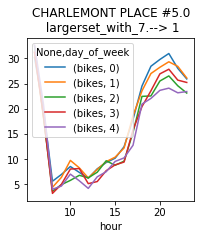

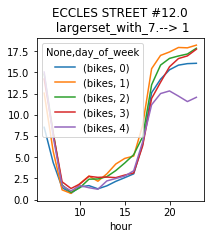

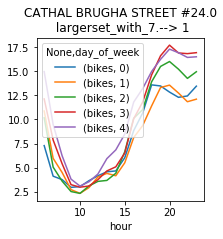

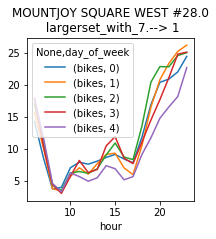

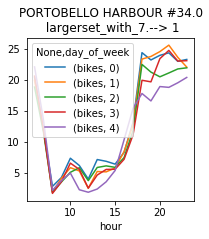

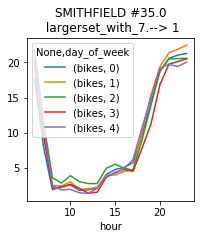

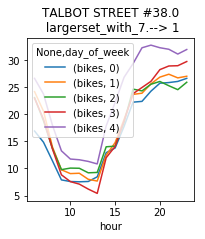

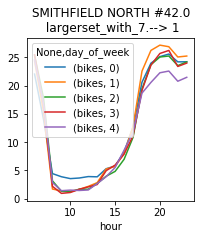

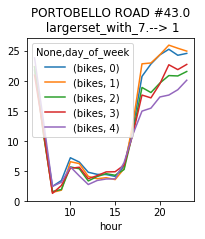

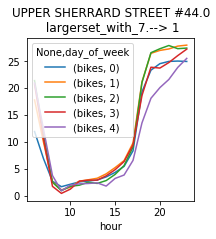

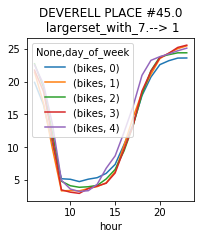

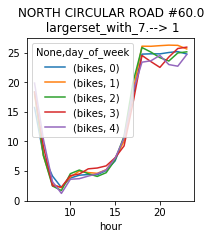

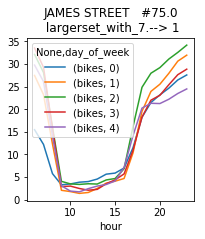

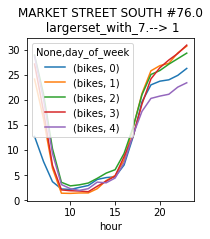

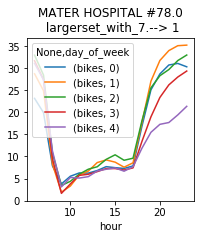

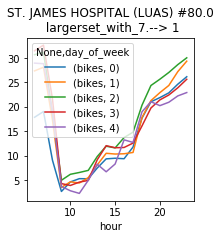

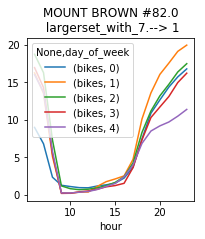

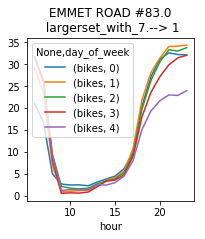

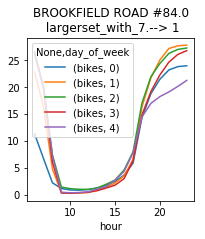

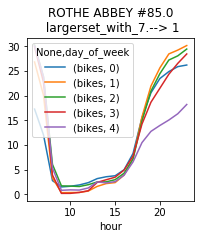

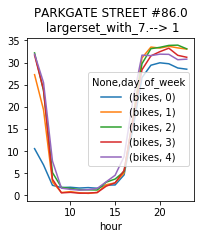

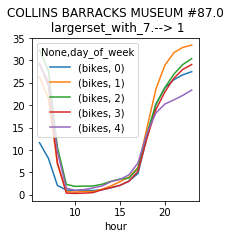

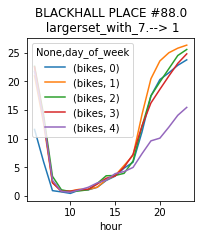

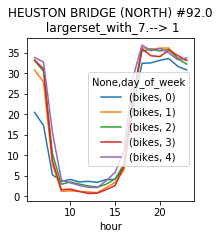

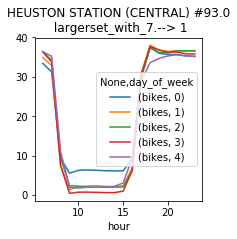

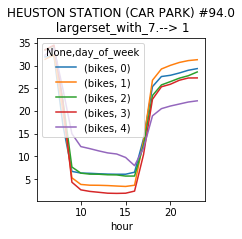

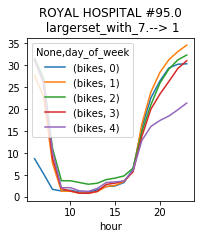

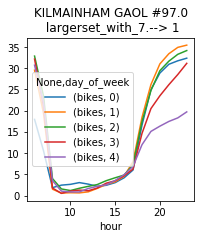

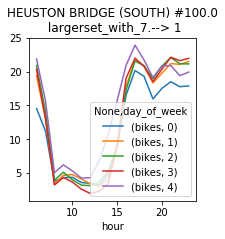

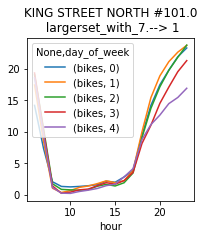

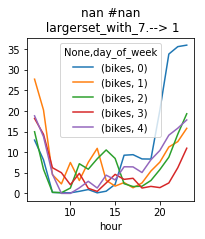

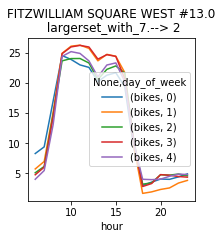

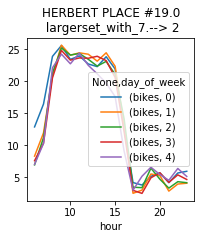

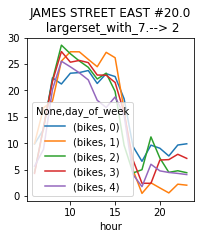

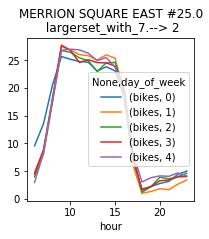

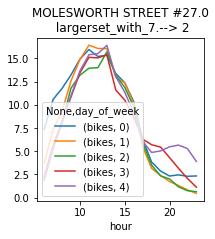

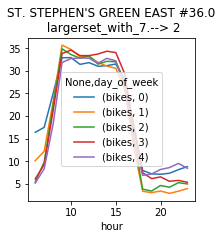

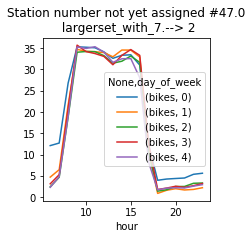

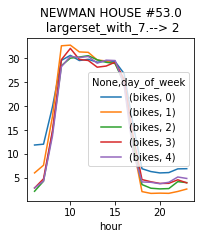

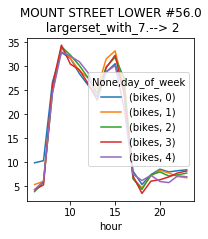

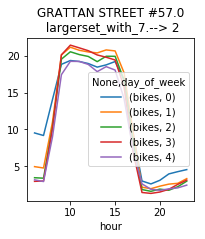

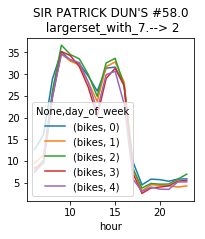

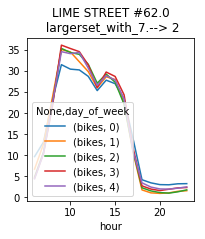

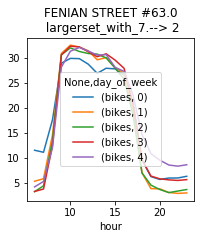

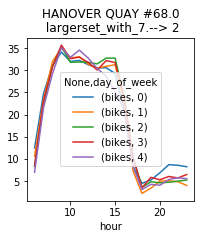

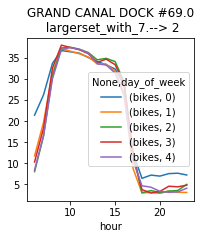

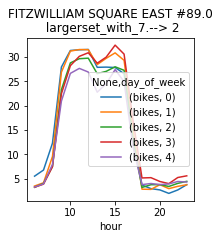

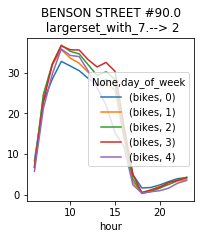

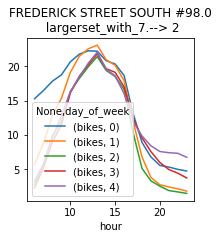

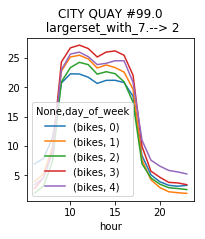

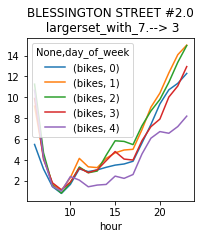

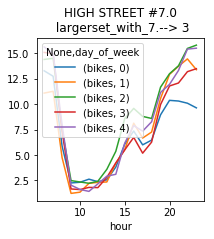

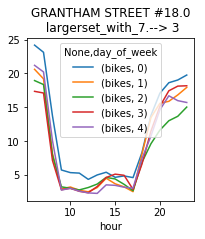

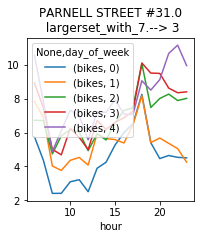

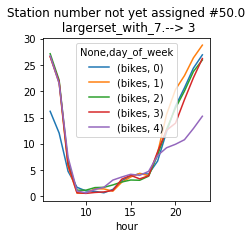

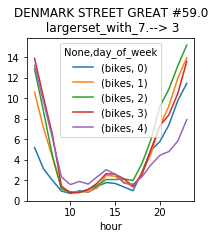

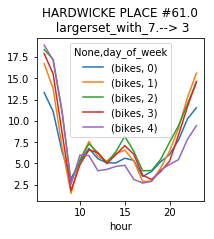

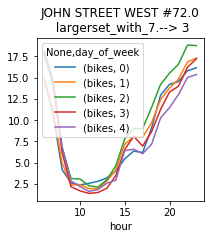

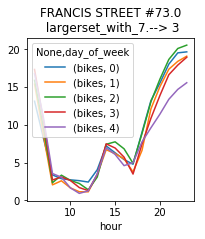

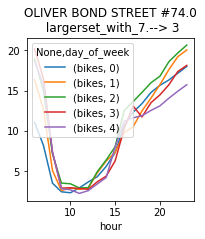

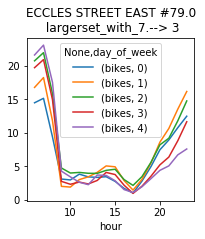

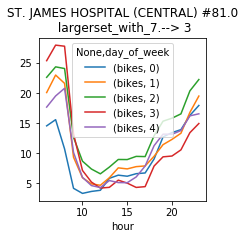

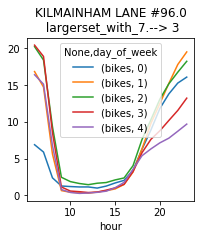

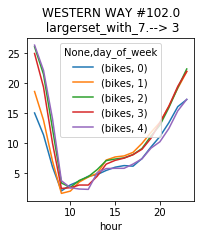

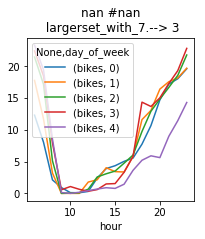

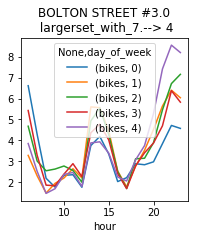

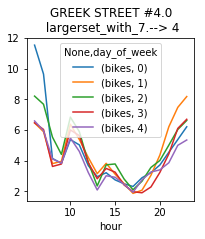

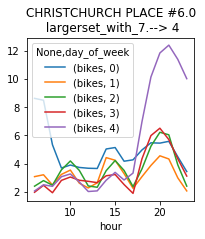

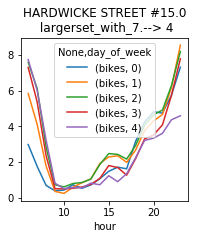

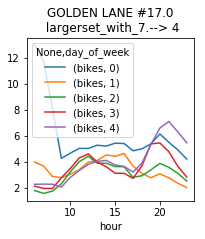

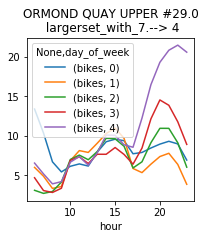

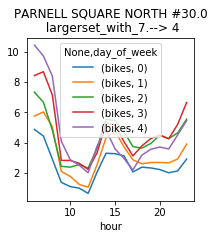

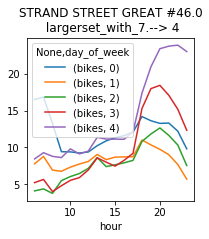

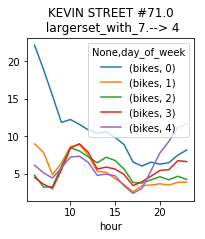

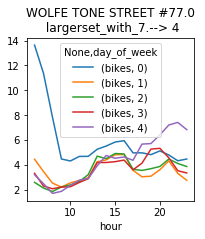

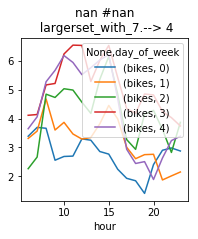

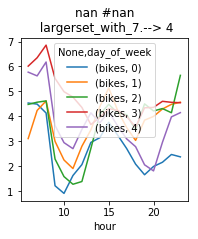

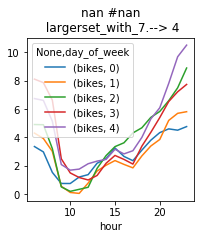

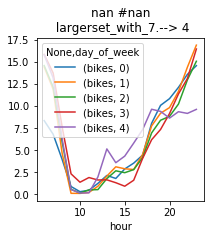

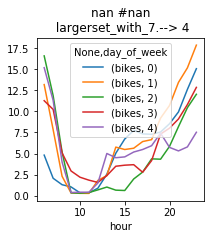

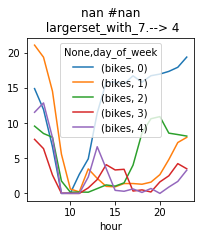

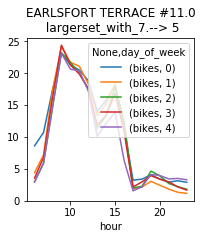

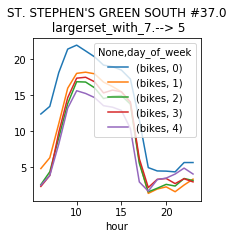

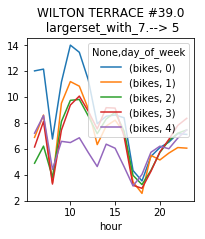

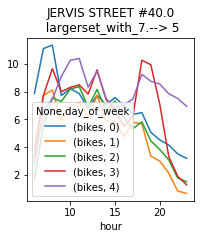

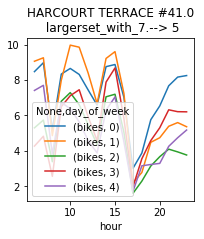

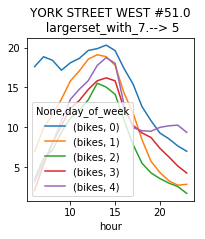

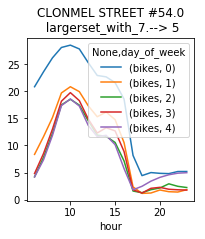

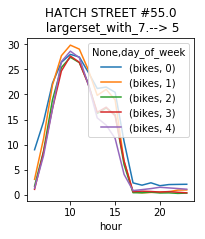

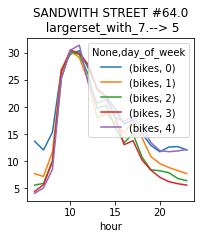

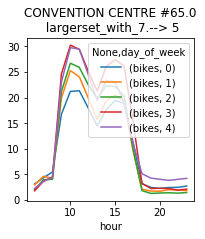

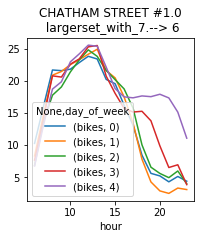

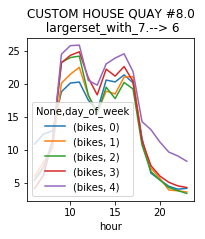

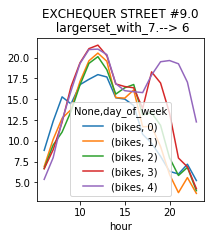

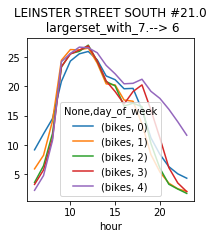

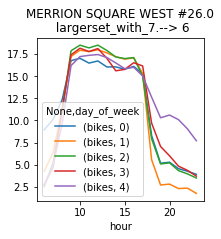

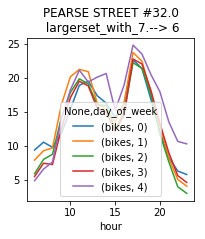

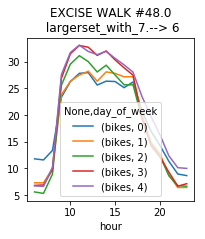

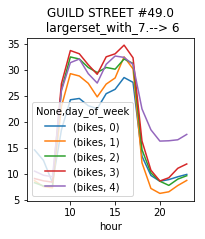

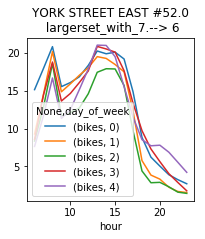

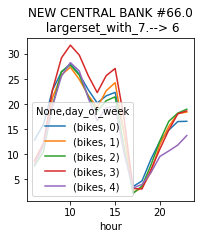

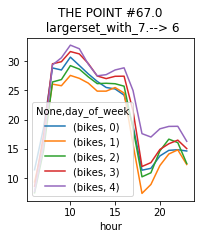

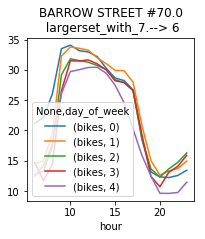

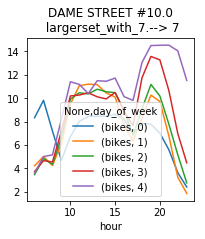

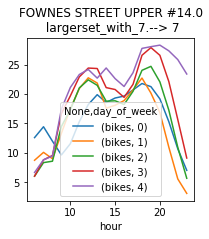

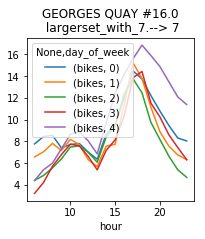

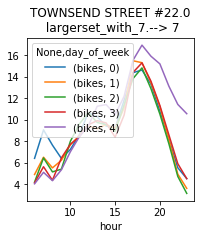

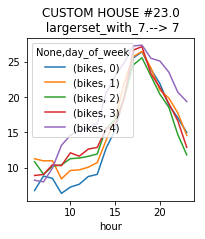

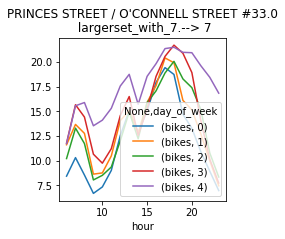

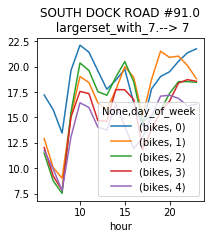

In [65]:
for j in range(1,8):
    print("j=",j)
    for i in range(0,120):
        
        try:
            
            dfPivot = pd.pivot_table(df[df['station_id']==i+1], values = ['bikes'], 
                                     columns=['day_of_week'], index = "hour") 

            if stations.loc[i]['kml-c7.80.50-normed'] == j:

                print(i)
                dfPivot.plot(subplots = False, figsize=(3, 3), layout=(5, 5), sharey=True, 
                                            title=str(stations.loc[i]['Name']) + " #" + 
                             str(stations.loc[i]['station_id'])  + "\n largerset_with_7.--> "+ 
                             str(stations.loc[i]['kml-c7.80.50-normed']) )
                
                #dfPivot.plot(subplots = True, figsize=(13, 13), layout=(5, 5), sharey=True, 
                #                            title=str(stations.loc[i]['Name']) + " #" + 
                #             str(stations.loc[i]['station_id'])  + "\n largerset_with_7.--> "+ 
                #             str(stations.loc[i]['largerset_with_7']) )
                
                              
                
                    #dfPivot.plot(subplots = True, figsize=(15, 15), layout=(5, 5), sharey=True, 
                #                        title=str(stations.loc[i]['Name']) + " #" + str(stations.loc[i]['station_id'])  + "\n Cluster3: "+ str(stations.loc[i]['3_clusters']) )
    
        except:
            print("problem with: ",i)
            pass

In [ ]:
df.head()

[1 2 2 2 2 2 2 1 0 2 0 2 1 0 2 2 2 2 1 1 2 0 2 1 0 0 2 2 2 2 0 0 2 2 1 0 0
 0 2 2 2 2 2 2 2 1 1 1 2 0 0 1 0 1 1 0 1 2 2 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 2 2 2 2 2 2 0 1 2 2 2 2 2 2 2 2 2 2 2 2]
110
2019-03-22
[17 26 67]


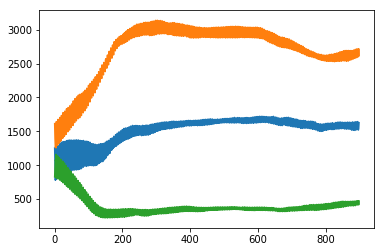

In [67]:
from sklearn.cluster import KMeans

n_clusters = 3

# Fit kmeans model and plot the centroids
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(pivot)
clusters = kmeans.predict(pivot)
print(clusters)

kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(pivot)
for k, colour in zip(kmeans.cluster_centers_, colours):
    plt.plot(100*k,label=colour)

    

print(len(clusters))

from datetime import date
today = str(date.today())
print(today)



print(np.bincount(clusters))

xx = pd.DataFrame() 
xx['dd']= clusters.astype(int)
stations['largerset_with_3'] = xx['dd'].astype(int)
stations.to_csv('locations_with_7-1.csv')

[4 6 6 6 3 6 6 4 2 3 4 6 4 2 6 3 6 6 4 4 3 3 6 4 2 2 3 3 6 3 2 2 6 6 5 2 3
 3 3 3 6 6 6 0 3 5 1 1 6 3 2 1 2 4 5 2 5 6 3 0 5 1 1 1 4 4 5 5 5 3 6 6 6 0
 6 6 0 0 0 0 6 6 6 6 6 6 6 1 5 2 6 6 0 6 6 6 2 1 6 6 0 6 6 6 6 6 6 6 6 6]
[ 9  8 12 16 10  9 46]


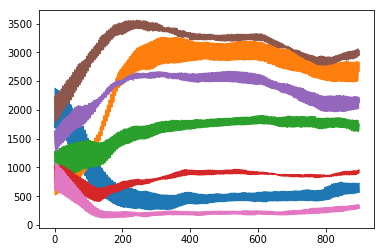

In [73]:
from sklearn.cluster import KMeans


n_clusters = 7

# Fit kmeans model and plot the centroids
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(pivot)
clusters = kmeans.predict(pivot)
print(clusters)

kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(pivot)
for k, colour in zip(kmeans.cluster_centers_, colours):
    plt.plot(100*k,label=colour)

print(np.bincount(clusters))

xx = pd.DataFrame() 
xx['dd']= clusters.astype(int)
stations['largerset_with_7.1-short'] = xx['dd'].astype(int)
stations.to_csv('locations_with_7-1.csv')

In [80]:
df.head()

station_id  bikes  spaces  total_docks  transactions  \
timestamp                                                                   
2018-01-15 08:00:02           2      0      20           20             0   
2018-01-15 08:00:02          37     11      19           30             0   
2018-01-15 08:00:02          98     10      19           30             1   
2018-01-15 08:00:02           1      7      24           31            -8   
2018-01-15 08:00:02          52     30       2           32             3   

                     deposits  withdrawals  cumm.deposits  cumm.withdrawals  \
timestamp                                                                     
2018-01-15 08:00:02         0            0              0                 0   
2018-01-15 08:00:02         0            0              0                 0   
2018-01-15 08:00:02         1            0              1                 0   
2018-01-15 08:00:02         0            8              0                 1   
2018-01-15 08:00:02         3            0              6                 0   

                     bike_lag  hour  day_of_week  month      time  overloaded  \
timestamp                                                                       
2018-01-15 08:00:02         0     8            0      1  08:00:00           0   
2018-01-15 08:00:02        11     8            0      1  08:00:00           0   
2018-01-15 08:00:02         9     8            0      1  08:00:00           0   
2018-01-15 08:00:02        15     8            0      1  08:00:00           0   
2018-01-15 08:00:02        27     8            0      1  08:00:00           0   

                     underloaded  cumm.overloaded  cumm.underloaded  \
timestamp                                                             
2018-01-15 08:00:02            1                0                 1   
2018-01-15 08:00:02            0                0                 0   
2018-01-15 08:00:02            0                0                 0   
2018-01-15 08:00:02            0                0                 0   
2018-01-15 08:00:02            0                0                 0   

                           date      norm  
timestamp                                  
2018-01-15 08:00:02  2018-01-15  0.000000  
2018-01-15 08:00:02  2018-01-15  0.366667  
2018-01-15 08:00:02  2018-01-15  0.333333  
2018-01-15 08:00:02  2018-01-15  0.225806  
2018-01-15 08:00:02  2018-01-15  0.937500

In [73]:
df.columns

Index(['tfl_id', 'bikes', 'spaces', 'total_docks', 'norm', 'time'], dtype='object')

In [79]:
stations['norm'].value_counts()

1.0    31
3.0    21
2.0    19
4.0     9
5.0     8
6.0     5
7.0     5
Name: norm, dtype: int64

In [ ]:
for j in range(0,7):
    print("j=",j)
    for i in range(0,120):
        
        try:
            
            dfPivot = pd.pivot_table(df[df['station_id']==i+1], values = ['bikes'], 
                                     columns=['day_of_week'], index = "hour") 

            if stations.loc[i]['largerset_with_7'] == j:

                print(i)
                dfPivot.plot(subplots = False, figsize=(3, 3), layout=(5, 5), sharey=True, 
                                            title=str(stations.loc[i]['Name']) + " #" + 
                             str(stations.loc[i]['station_id'])  + "\n largerset_with_7.--> "+ 
                             str(stations.loc[i]['largerset_with_7']) )
                
                #dfPivot.plot(subplots = True, figsize=(13, 13), layout=(5, 5), sharey=True, 
                #                            title=str(stations.loc[i]['Name']) + " #" + 
                #             str(stations.loc[i]['station_id'])  + "\n largerset_with_7.--> "+ 
                #             str(stations.loc[i]['largerset_with_7']) )
                
                              
                
                    #dfPivot.plot(subplots = True, figsize=(15, 15), layout=(5, 5), sharey=True, 
                #                        title=str(stations.loc[i]['Name']) + " #" + str(stations.loc[i]['station_id'])  + "\n Cluster3: "+ str(stations.loc[i]['3_clusters']) )
    
        except:
            print("problem with: ",i)
            pass

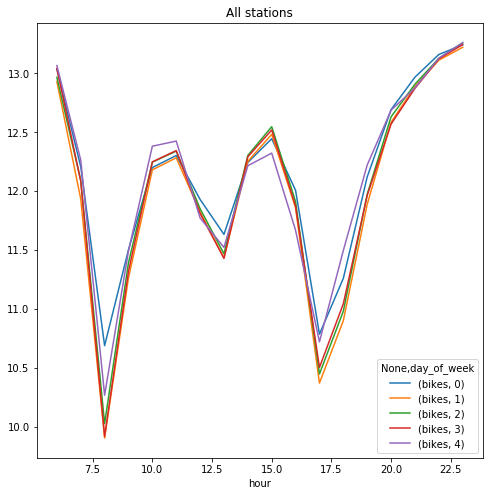

In [66]:
dfPivot = pd.pivot_table(df, values = ['bikes'], columns=['day_of_week'], index = "hour") 

dfPivot.plot(subplots = False, figsize=(8, 8), layout=(5, 5), sharey=True, 
                                            title="All stations" )

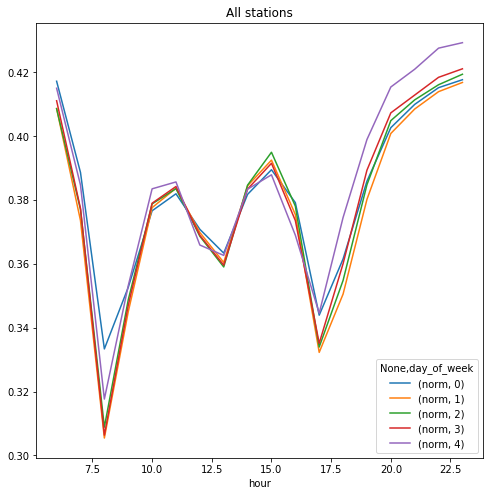

In [67]:
dfPivot = pd.pivot_table(df, values = ['norm'], columns=['day_of_week'], index = "hour") 

dfPivot.plot(subplots = False, figsize=(8, 8), layout=(5, 5), sharey=True, 
                                            title="All stations" )